## Name : Mani Botla
## Date : 8/16/2025
## Project : Exploratory Data analysis for dataset containing travel information
## Goal : 
- uncover behavioral patterns and booking strategies among travelers using exploratory data analysis, with the aim of helping a travel platform optimize its recommendation engine, marketing strategy, and user experience.

## Scope of the Analysis:  
- Device usage trends and their impact on booking spontaneity  
- Country-level differences in trip complexity and duration  
- Seasonal patterns in multi-city travel behavior  
- Affiliate performance and influence on itinerary structure  
- Popular city-to-city transitions and travel flows 


### Import Libraries 
```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset
```python
df = pd.read_csv("train_set_cleaned.csv", parse_dates=["checkin", "checkout"])
```

In [ ]:
df = pd.read_csv("train_set_cleaned.csv", parse_dates=["checkin", "checkout"])

# Question 1 : How do trip duration and number of cities visited vary by booker country?


### Step 1: Aggregate for trip summary

Grouping the dataset by `utrip_id` to calculate trip-level statistics. For each trip, the following are extracted:
- `booker_country` : The traveler's country 
- `num_cities` : The number of cities visited 
- `trip_duration` : The total trip duration in days 
```python
trip_summary = df.groupby("utrip_id").agg(
    booker_country=("booker_country", "first"),
    num_cities=("city_id", "count"),
    trip_duration=("stay_duration", "sum")
).reset_index()
```

### Step 2: Calculating averages

Grouping the trip-level summary by `booker_country` to compute:
- Average number of cities visited per trip
- Average trip duration
- Total number of trips originating from each country
- Print the country_stats to get in detail rates/percentages.
```python
country_stats = trip_summary.groupby("booker_country").agg(
    avg_num_cities=("num_cities", "mean"),
    avg_trip_duration=("trip_duration", "mean"),
    total_trips=("utrip_id", "count")
).sort_values(by="avg_num_cities", ascending=False).reset_index()

print(country_stats)
```


### Step 3: Scatter Plot

Build scatter plot to visualize the relationship between:
- `x-axis` : Average number of cities visited 
- `y-axis` : Average trip duration 
- `total_trips`: Bubble size represents the number of trips 
- Color represents the booker country
```python
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_stats,
    x="avg_num_cities",
    y="avg_trip_duration",
    size="total_trips",
    hue="booker_country",
    palette="tab10",
    legend="brief",
    sizes=(50, 300)
)

plt.title("Trip Duration vs. Number of Cities by Booker Country")
plt.xlabel("Average Number of Cities per Trip")
plt.ylabel("Average Trip Duration (days)")
plt.grid(True)
plt.tight_layout()
plt.show()
```

         booker_country  avg_num_cities  avg_trip_duration  total_trips
0  The Devilfire Empire        5.541313           8.832524        46341
1               Elbonia        5.414747           9.554098        39031
2                Gondal        5.329150           9.140913        90524
3              Bartovia        5.097614           9.046720         5030
4           Tcherkistan        4.953805          11.545168        14612


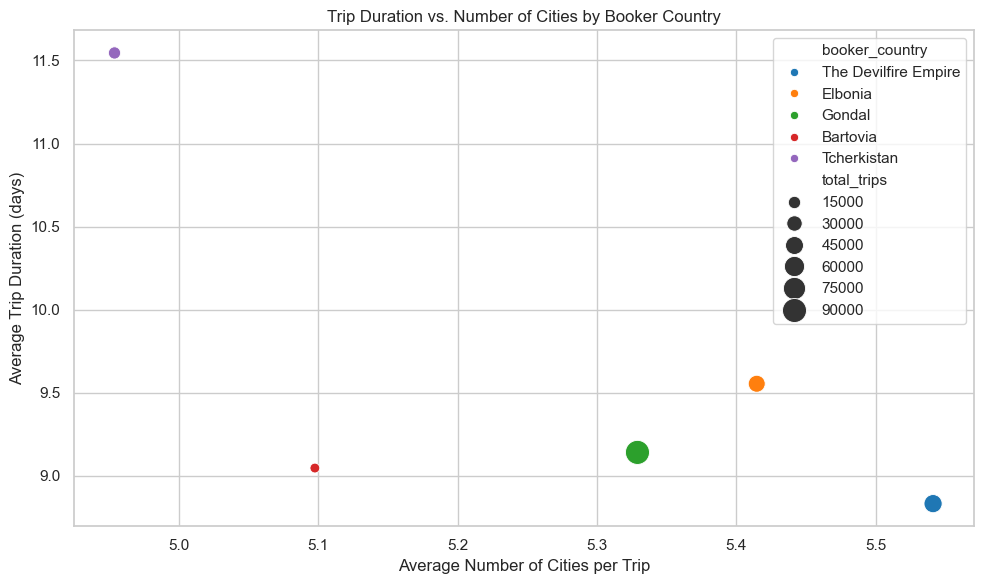

In [43]:
#Step 1:
trip_summary = df.groupby("utrip_id").agg(
    booker_country=("booker_country", "first"),
    num_cities=("city_id", "count"),
    trip_duration=("stay_duration", "sum")
).reset_index()
#Step 2:
country_stats = trip_summary.groupby("booker_country").agg(
    avg_num_cities=("num_cities", "mean"),
    avg_trip_duration=("trip_duration", "mean"),
    total_trips=("utrip_id", "count")
).sort_values(by="avg_num_cities", ascending=False).reset_index()
print(country_stats)
#Step 3:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_stats,
    x="avg_num_cities",
    y="avg_trip_duration",
    size="total_trips",
    hue="booker_country",
    palette="tab10",
    legend="brief",
    sizes=(50, 300)
)
plt.title("Trip Duration vs. Number of Cities by Booker Country")
plt.xlabel("Average Number of Cities per Trip")
plt.ylabel("Average Trip Duration (days)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Results Analysis: 
- **The Devilfire Empire** shows the **highest average number of cities per trip** with a moderate trip duration (~9 days). This suggests travelers from this country prefer **fast-paced, multi-city itineraries**.
- **Elbonia** and **Gondal** both average around **5.3 cities per trip**, with Elbonia leaning toward **longer trips (~10 days)** and Gondal slightly shorter (~9.5 days). These countries reflect balanced travel behavior — moderately complex and reasonably long.
- **Bartovia** has the lowest average number of cities indicating simpler, possibly more localized travel.
- **Tcherkistan** stands out with the longest average trip duration approx. 11.5 days, suggesting travelers may prefer slower, immersive travel rather than hopping between destinations.

This analysis Countries like **The Devilfire Empire** and **Elbonia** may benefit from multi-city travel packages or itinerary planning tools.
- `Tcherkistan’s` long stays could signal demand for extended-stay accommodations or cultural experiences.
- `size of the bubbles` shows trip volume with Gondal having the highest, making it a key market for travel platforms.


# Question 2:  During which months is multi-city travel most and least popular?

#### Step 1: Extract Month from Check-in Date
extract the month from each check-in timestamp to analyze seasonal travel patterns.
```python
df["month"] = df["checkin"].dt.month
```

#### Step 2: Count number of Cities per Trip
Calculate the number of cities visited per trip using the `utrip_id` identifier.
```python
num_cities=("city_id", "count")
trip_city_counts = df.groupby("utrip_id")["city_id"].count().reset_index(name="num_cities")
df = df.merge(trip_city_counts, on="utrip_id")
```

#### Step 3: Define Multi-City Trips and group by month
Trips with more than one city are flagged as multi-city. 
```python
df["is_multi_city"] = df["num_cities"] > 1
```
group the data by month to compute:
- Total number of trips
- Number of multi-city trips
- Percentage of multi-city trips per month
```python
monthly_stats = df.groupby("month").agg(
    multi_city_trips=("is_multi_city", "sum"),
    total_trips=("utrip_id", "nunique")
).reset_index()

monthly_stats["multi_city_pct"] = (monthly_stats["multi_city_trips"] / monthly_stats["total_trips"]) * 100
```

#### Step 4: Visualize Multi-City Travel Popularity
Build a line plot to show how the popularity of multi-city travel changes across months.
- `x-label` : Month
- `y-label` : Multi-city trips(%)
```python
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_stats, x="month", y="multi_city_pct", marker="o", color="teal")
plt.title("Multi-City Travel Popularity by Month")
plt.xlabel("Month")
plt.ylabel("Multi-City Trips (%)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()
```

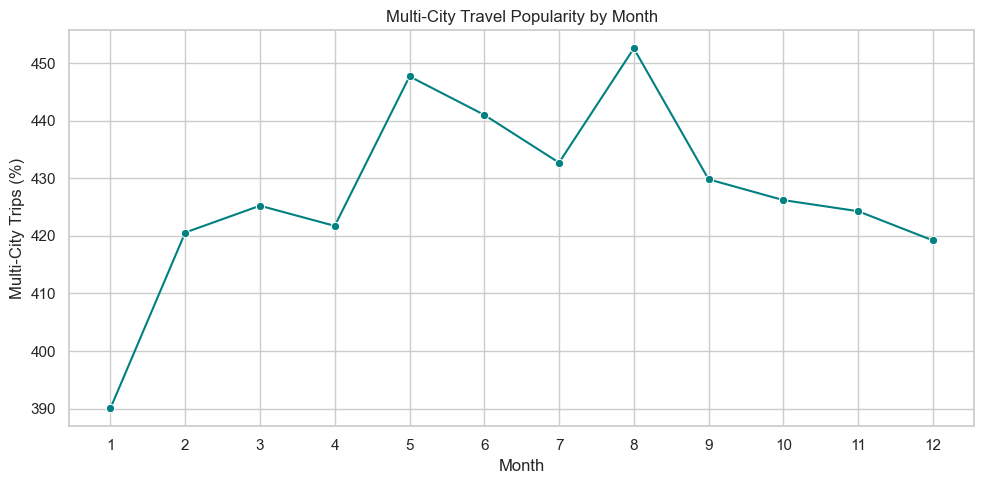

In [48]:
# Step 1:
df["month"] = df["checkin"].dt.month

# Step 2:
num_cities=("city_id", "count")
trip_city_counts = df.groupby("utrip_id")["city_id"].count().reset_index()
trip_city_counts.rename(columns={"city_id": "city_count"}, inplace=True)

df = df.merge(trip_city_counts, on="utrip_id")

# Step 3:
df["is_multi_city"] = df["num_cities"] > 1
monthly_stats = df.groupby("month").agg(
    multi_city_trips=("is_multi_city", "sum"),
    total_trips=("utrip_id", "nunique")
).reset_index()

monthly_stats["multi_city_pct"] = (monthly_stats["multi_city_trips"] / monthly_stats["total_trips"]) * 100
#Step 4
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_stats, x="month", y="multi_city_pct", marker="o", color="teal")
plt.title("Multi-City Travel Popularity by Month")
plt.xlabel("Month")
plt.ylabel("Multi-City Trips (%)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

## Result Analysis: 

- **January–March:** Starts low (~390%), suggesting fewer multi-city trips early in the year—possibly due to post-holiday fatigue or colder weather.
- **April–July:** Gradual increase, peaking in **August (approx~450%)**, which usually aligns with summer vacations and peak travel season.
- **September–December:** Decline toward ~410%, likely reflecting the return to school/work and fewer extended trips.
This explains that  Multi-city travel is clearly seasonal, with a strong summer peak. This could be driven by longer vacations, better weather, or more flexible schedules. Tourism boards could use this to optimize marketing, staffing, or pricing strategies around peak months.


# Question 3 : How do spontaneous booking rates differ by device class, and are mobile users more likely to make last-minute travel decisions?

#### Step 1: Calculate spontaneous trip rate by device type
```python
trip_rate = df.groupby('device_class')['is_spontaneous'].mean().reset_index()
```

#### Step 2: Visualize
```python
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='device_class', y='is_spontaneous', hue='device_class', data=trip_rate, palette='viridis', legend=False)
plt.title('Spontaneous Trip Rate by Device Type', fontsize=16)
plt.xlabel('Device Type', fontsize=14)
plt.ylabel('Spontaneous Trip Rate', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

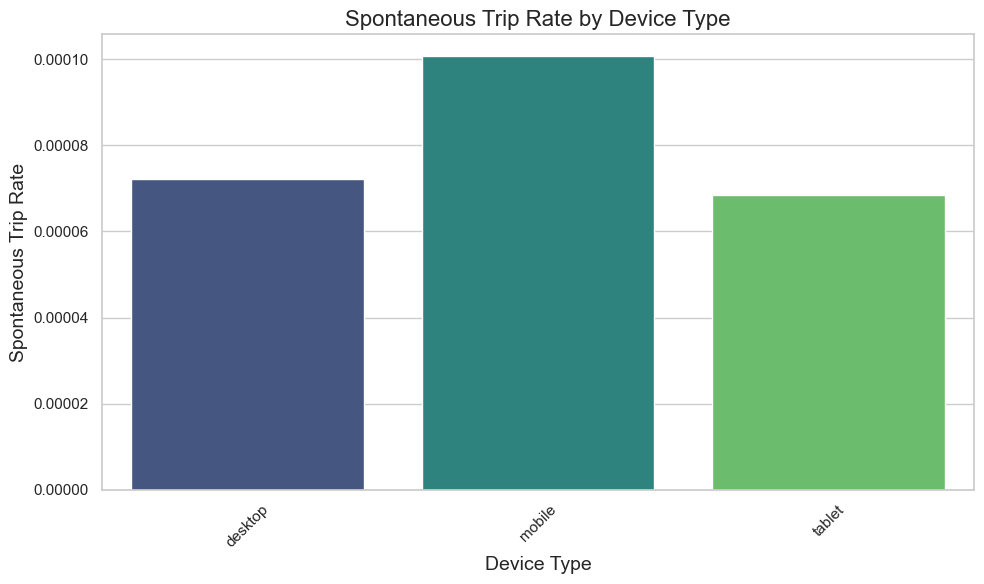

In [49]:
# Step 1:
trip_rate = df.groupby('device_class')['is_spontaneous'].mean().reset_index()

#Step 2:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='device_class', y='is_spontaneous', hue= 'device_class',data=trip_rate, palette='viridis',legend=False)
plt.title('Spontaneous Trip Rate by Device Type', fontsize=16)
plt.xlabel('Device Type', fontsize=14)
plt.ylabel('Spontaneous Trip Rate', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Result Analysis:
- Mobile users show the highest spontaneous trip rate, indicating that travelers using mobile devices are more likely to make spontaneous or last-minute bookings.
- Desktop users fall in the middle, suggesting more planned behavior.
- Tablet users have the lowest spontaneous trip rate, possibly due to less frequent use.
This suggests mobile platforms encourage more impulsive travel decisions — most likely due to ease of access, app notifications and on-the-go browsing.



# Question 4: Which destination combinations are most frequently booked together? 

#### Step 1: Sort trips chronologically within each user trip
```python
df_sorted = df.sort_values(by=["utrip_id", "checkin"])
```

#### Step 2: Identify adjacent city pairs within each trip and drop rows with no next city
```python
df_sorted["next_city"] = df_sorted.groupby("utrip_id")["city_id"].shift(-1)
city_pairs = df_sorted.dropna(subset=["next_city"])
```

#### Step 3: Count frequency of each city-to-city transition and display top 10 most frequent city pairs
```python
pair_counts = (
    city_pairs.groupby(["city_id", "next_city"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)
print(pair_counts.head(10))
```

In [27]:
# Step 1:
df_sorted = df.sort_values(by=["utrip_id", "checkin"])
#Step 2:
df_sorted["next_city"] = df_sorted.groupby("utrip_id")["city_id"].shift(-1)
city_pairs = df_sorted.dropna(subset=["next_city"])

# Step 3
pair_counts = (
    city_pairs.groupby(["city_id", "next_city"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)
print(pair_counts.head(10))

        city_id  next_city  count
213949    51259    51259.0   2968
152881    36063    36063.0   2073
71916     17013    17013.0   1722
199475    47499    47499.0   1641
272176    64876    55128.0   1446
136756    31890    55284.0   1395
221130    52815    52815.0   1383
232016    55128    64876.0   1363
278849    66648    18417.0   1293
252513    60222    60222.0   1247


## Result Analysis:
There is High Frequency of Same-City Transitions (`51259` to `51259`). This suggests that Travelers may book multiple stays in the same city separately (e.g., changing hotels or extending trips). another insight to consider is these cities might serve as central points for regional exploration, with travelers returning after visiting nearby destinations.
There are some behaviors patterns as Some users may prefer staying in familiar cities rather than exploring new ones.
In this case, Travel Platforms could offer bundled bookings for repeat cities to simplify user experience.


# Question 5: Are there regional differences in trip characteristics, such as duration or complexity, that might suggest varying planning behaviors?

#### Step 1: Convert check-in to datetime and aggregate trip-level
```python
df["checkin"] = pd.to_datetime(df["checkin"])
trip_summary = df.groupby("utrip_id").agg(
    trip_start=("checkin", "min"),
    trip_end=("checkin", "max"),
    duration_days=("checkin", lambda x: (x.max() - x.min()).days + 1),
    unique_cities=("city_id", "nunique"),
    region=("booker_country", lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
).reset_index()
```

#### Step 3: Group by region to compare trip characteristics
```python
region_summary = trip_summary.groupby("region").agg(
    avg_duration=("duration_days", "mean"),
    avg_complexity=("unique_cities", "mean"),
    trip_count=("utrip_id", "count")
).sort_values(by="trip_count", ascending=False)
print(region_summary.head(10))
```

#### Step 3: Visualize
- Build the scatter plot
```python
plt.figure(figsize=(8,6))
plt.scatter(region_summary["avg_duration"], region_summary["avg_complexity"], s=region_summary["trip_count"]/100, alpha=0.7)
for region, row in region_summary.iterrows():
    plt.text(row["avg_duration"], row["avg_complexity"], region, fontsize=9)

plt.xlabel("Average Trip Duration (days)")
plt.ylabel("Average Trip Complexity (unique cities)")
plt.title("Regional Differences in Trip Characteristics")
plt.grid(True)
plt.show()
```

                      avg_duration  avg_complexity  trip_count
region                                                        
Gondal                    8.535632        4.861061       90536
The Devilfire Empire      8.221673        4.684753       46316
Elbonia                   8.837000        5.039495       39043
Tcherkistan              10.301636        3.601972       14607
Bartovia                  8.474583        4.639198        5036


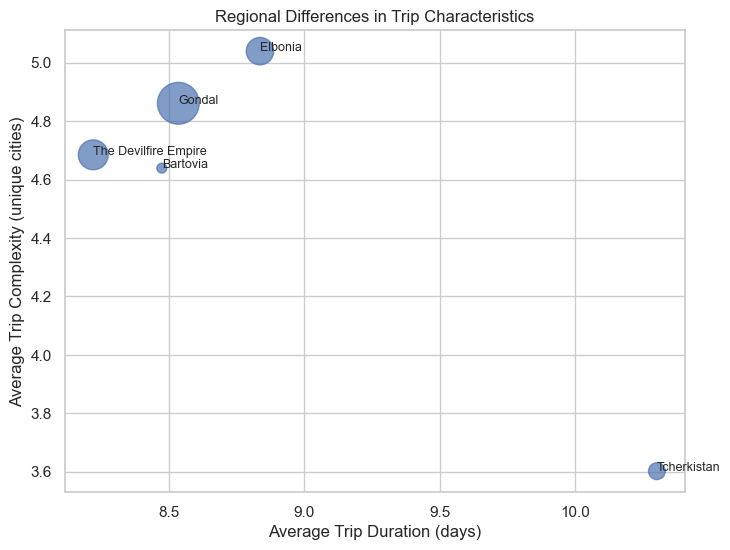

In [30]:
# Step 1:
df["checkin"] = pd.to_datetime(df["checkin"])
trip_summary = df.groupby("utrip_id").agg(
    trip_start=("checkin", "min"),
    trip_end=("checkin", "max"),
    duration_days=("checkin", lambda x: (x.max() - x.min()).days + 1),
    unique_cities=("city_id", "nunique"),
    region=("booker_country", lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
).reset_index()
# Step 2:
region_summary = trip_summary.groupby("region").agg(
    avg_duration=("duration_days", "mean"),
    avg_complexity=("unique_cities", "mean"),
    trip_count=("utrip_id", "count")
).sort_values(by="trip_count", ascending=False)
print(region_summary.head(10))
#Step 3: 
plt.figure(figsize=(8,6))
plt.scatter(region_summary["avg_duration"], region_summary["avg_complexity"], s=region_summary["trip_count"]/100, alpha=0.7)
for region, row in region_summary.iterrows():
    plt.text(row["avg_duration"], row["avg_complexity"], region, fontsize=9)

plt.xlabel("Average Trip Duration (days)")
plt.ylabel("Average Trip Complexity (unique cities)")
plt.title("Regional Differences in Trip Characteristics")
plt.grid(True)
plt.show()

## Result Analysis:
- `Tcherkistan`  
- **Longest average duration (~10 days)**  
- **Lowest complexity (~3.6 cities)**  
-  Travelers from Tcherkistan tend to stay longer in fewer places. This suggests a preference for slower-paced, immersive travel—possibly valuing depth over breadth.

- `Elbonia`
- **Shorter duration (~9 days)**  
- **Higher complexity (~5 cities)**  
- Elbonian travelers appear to favor fast-paced, multi-city itineraries. This could reflect a more exploratory mindset or time-constrained travel with high mobility.

- `Bartovia, Gondal, and The Devilfire Empire`  
- **Moderate duration (~8.5 days)**  
- **Moderate complexity (~4.6–4.8 cities)**  
  
This results suggest that regions with longer durations and fewer cities may prioritize comfort, cultural immersion, or leisure. In contrast, regions with shorter durations and more cities might reflect goal-oriented or bucket-list travel styles.


# Question 6: Which booking countries have the longest average stay durations?

#### Step 1: Prepare stay_duration data
-Ensure that the `stay_duration` column is numeric. Any non-numeric or invalid entries are coerced to NaN.
```python
df['stay_duration'] = pd.to_numeric(df['stay_duration'], errors='coerce')
```
-Drop rows with missing values in either `stay_duration` or `booker_country` to ensure accurate aggregation.
```drop
df_cleaned = df.dropna(subset=['stay_duration', 'booker_country'])
```

#### Step 2 : Aggregate and visualize the data
- Group by booker_country and calculate average stay duration
```python
avg_stay_by_country = df_cleaned.groupby('booker_country')['stay_duration'].mean().sort_values(ascending=False).head(10)
```
- Plot the bar chart
```python
plt.figure(figsize=(10, 6))
avg_stay_by_country.plot(kind='bar', color='teal')
plt.ylabel('Average Stay Duration (days)')
plt.xlabel('Booker Country')
plt.title('Top 10 Booking Countries by Average Stay Duration')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
```

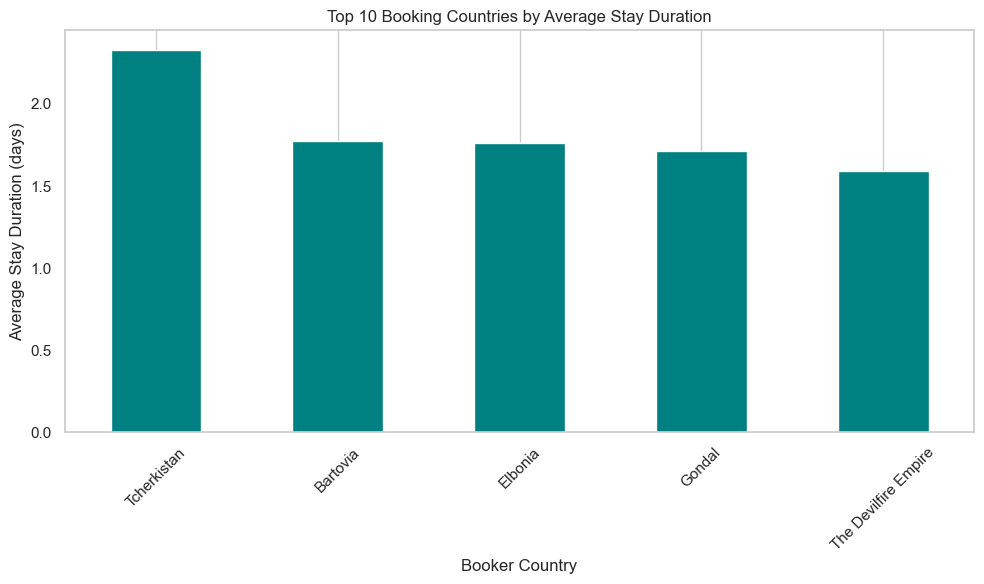

In [34]:
#Step 1:
df['stay_duration'] = pd.to_numeric(df['stay_duration'], errors='coerce')
df_cleaned = df.dropna(subset=['stay_duration', 'booker_country'])

#Step 2:
avg_stay_by_country = df_cleaned.groupby('booker_country')['stay_duration'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_stay_by_country.plot(kind='bar', color='teal')
plt.ylabel('Average Stay Duration (days)')
plt.xlabel('Booker Country')
plt.title('Top 10 Booking Countries by Average Stay Duration')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Result Analysis: 
- Tcherkistan stands out with the highest average stay duration.
- The other countries — (`Bartovia, Elbonia, Gondal, and The Devitine Empire`) — all have shorter average stays.
- 
This suggests that travelers from Tcherkistan may be more likely to book longer trips, possibly due to greater travel distance, cultural preferences. 

# Question 7 : Which referral channels drive the highest-value bookings in terms of stay duration?

#### Step 1: Prepare stay_duration data
Ensure the `stay_duration` column is numeric. Any invalid or non-numeric entries are coerced to `NaN`. 
```python
df['stay_duration'] = pd.to_numeric(df['stay_duration'], errors='coerce')
```
- Drop missing values
```python
df_cleaned = df.dropna(subset=['stay_duration', 'affiliate_id'])
```

#### Step 2: Aggregate average stay_Duration by affiliate
```python
avg_stay_by_affiliate = df_cleaned.groupby('affiliate_id')['stay_duration'].mean().sort_values(ascending=False).head(10)
```

#### Step 3: Visualize
Visualize the top 10 affiliate sources using a bar chart.
```python
plt.figure(figsize=(10, 6))
avg_stay_by_affiliate.plot(kind='bar', color='slateblue')
plt.ylabel('Average Stay Duration (days)')
plt.xlabel('Affiliate ID')
plt.title('Top 10 Affiliate Sources by Average Stay Duration')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
```

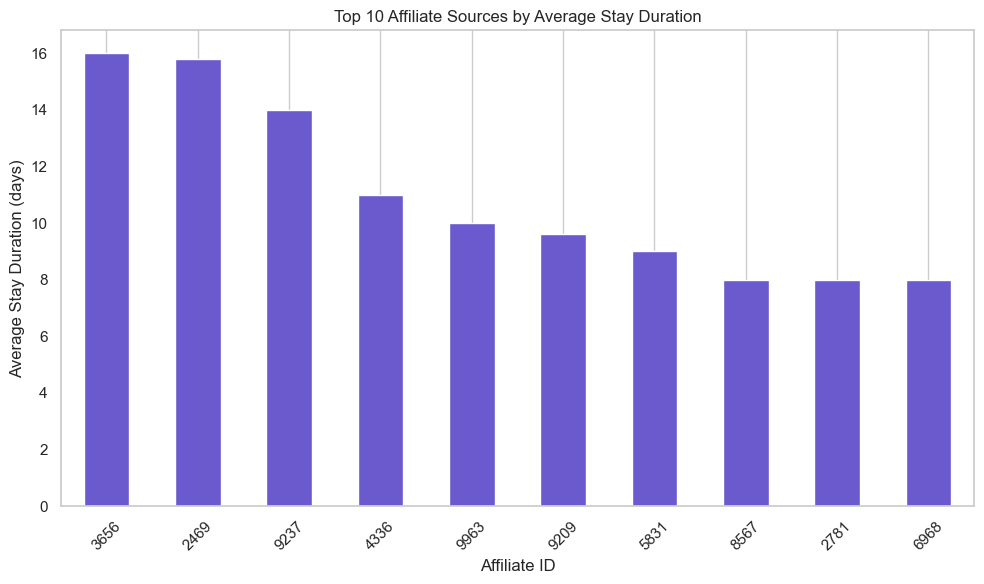

In [53]:
#Step 1: 
df['stay_duration'] = pd.to_numeric(df['stay_duration'], errors='coerce')
df_cleaned = df.dropna(subset=['stay_duration', 'affiliate_id'])
#Step 2: 
avg_stay_by_affiliate = df_cleaned.groupby('affiliate_id')['stay_duration'].mean().sort_values(ascending=False).head(10)
#Step 3: 
plt.figure(figsize=(10, 6))
avg_stay_by_affiliate.plot(kind='bar', color='slateblue')
plt.ylabel('Average Stay Duration (days)')
plt.xlabel('Affiliate ID')
plt.title('Top 10 Affiliate Sources by Average Stay Duration')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Results Analysis : 
- `Affiliate ID 3656` drive the highest valuebookings with an average stay of nearly `16 days`.
- `Affiliate ID 2469` falls with about `15 days`.
- Other top affiliates range between `13 and 9 days`.

- `Affiliate 3656 and 2469` are the most valuable referral channels. This might be becuase these channels likely attract travelers who plan extended vacations, more committed etc. 
- Travel platforms can use this data to prioiritize partnerships on these affiliates. 


##### Resources used
https://stackoverflow.com/questions/71209619/pandas-groupby-and-apply-aggregate-function-across-rows

https://python-graph-gallery.com/scatter-plot/

https://www.concur.com/blog/article/how-to-use-data-analytics-to-improve-your-travel-programs?&cookie_preferences=cpra

